In [1]:
# Install required packages
!pip install -q pandas openpyxl xgboost scikit-learn seaborn matplotlib

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [4]:
# Load the dataset
file_path = '/content/ipl2025.csv.xlsx'  # Upload this file to Colab manually
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [19]:
# One-hot encode team names
df_encoded = pd.get_dummies(df[['team_1', 'team_2']], prefix=['team1', 'team2'])

In [20]:
# Encode target (winner)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['winner_enc'] = le.fit_transform(df['winner'])

In [7]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Merge encoded features
X = pd.concat([df_encoded], axis=1)
y = df['winner_enc']

In [24]:
# XGBoost model with tuned parameters
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [25]:
# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
print("Improved Model Accuracy:", accuracy_score(y_test, y_pred))

Improved Model Accuracy: 0.5


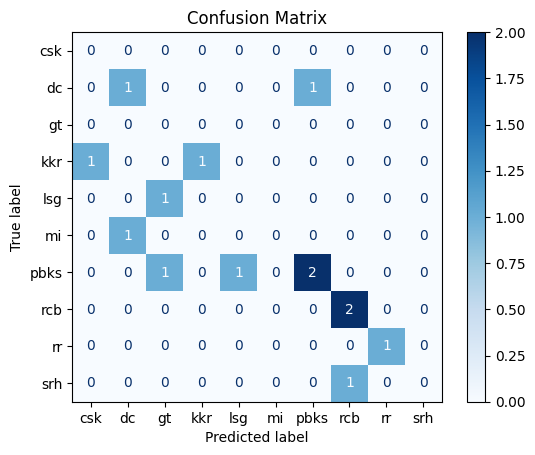

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [27]:
# Predict GT vs MI
team_1 = 'gt'
team_2 = 'mi'

In [28]:
# Create zero row with all teams
teams = sorted(set(df['team_1']) | set(df['team_2']))
match_features = {f'team1_{t}': 0 for t in teams}
match_features.update({f'team2_{t}': 0 for t in teams})
match_features[f'team1_{team_1}'] = 1
match_features[f'team2_{team_2}'] = 1

In [29]:
import numpy as np
match_df = pd.DataFrame([match_features])
pred = model.predict(match_df)[0]
predicted_winner = le.inverse_transform([pred])[0]
print(f"Predicted Winner between {team_1.upper()} and {team_2.upper()}: {predicted_winner.upper()}")

Predicted Winner between GT and MI: GT
